In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
x = pd.DataFrame(iris['data'], columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
y = iris['target']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [15]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(257.53846153846155, 504.7714285714286, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(193.15384615384616, 427.11428571428576, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(321.9230769230769, 427.11428571428576, 'X[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(128.76923076923077, 349.4571428571429, 'X[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(64.38461538461539, 271.8, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(193.15384615384616, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 349.4571428571429, 'X[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(321.9230769230769, 271.8, 'X[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(257.53846153846155, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(386.3076923076923, 194.14285714285717, 'X[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(32

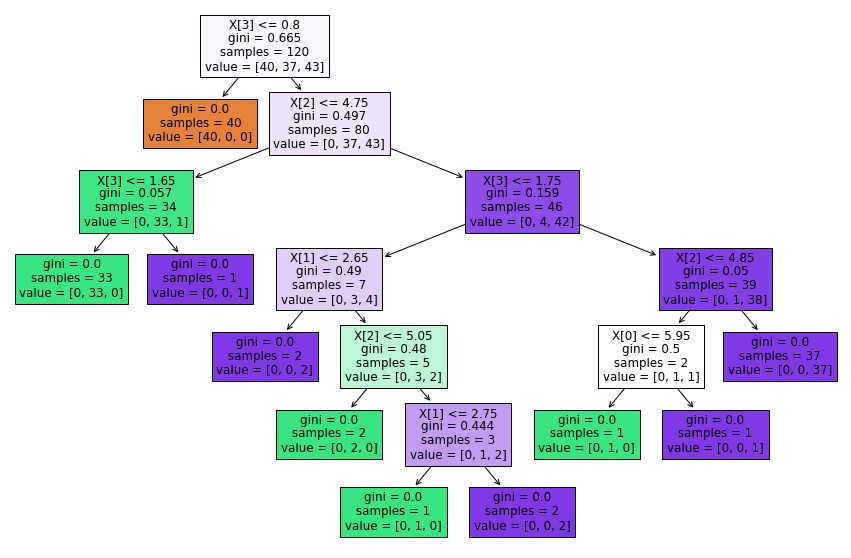

In [17]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled = True)
#plt.figure(figsize=(20,20))
#tree.plot_tree(dt_model_1,filled=True, class_names=[str(i) for i in set(y1)], feature_names = x1.columns)

In [18]:
y_pred = dt.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [22]:
param = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' :  [1,2,3,4,5],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
dt_model = DecisionTreeClassifier()

In [25]:
grid = GridSearchCV(dt_model, param_grid= param, cv=5, scoring='accuracy')

In [26]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [27]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'random'}

In [28]:
grid.best_score_

0.9583333333333334

In [30]:
y_pred=grid.predict(x_test)

In [31]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  7  6]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.54      0.70        13
           2       0.54      1.00      0.70         7

    accuracy                           0.80        30
   macro avg       0.85      0.85      0.80        30
weighted avg       0.89      0.80      0.80        30



In [32]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [34]:
score

0.8